Pearson Correlation (-1,1) - numerical features and numerical target / feature  , detect redundant features , linear relationships
Spearman Correlation (-1,1) - numerical features and numerical target / feature , detect redundant features , non linear relationships
ANOVA (0,∞) - categorical features and numerical target / feature , detect important features
Chi-Squared (0,∞) - categorical features and categorical target / feature , detect important features , (not useful for feature - feature relationships)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif , chi2
from sklearn.preprocessing import LabelEncoder


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


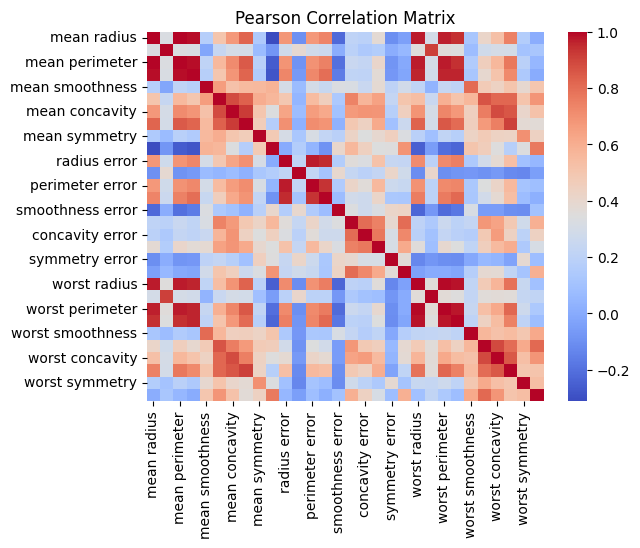

In [3]:
pearson_corr = X.corr(method='pearson')
sns.heatmap(pearson_corr, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()


In [4]:
def drop_redundant_features(X,threshold=0.9 , method='pearson'):
    corr_matrix = X.corr(method=method)
    #upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    #sns.heatmap(upper_tri, fmt=".2f", cmap='coolwarm')
    #plt.title(f'{method.capitalize()} Correlation Matrix (Upper Triangle)')
    #plt.show()
    redundant_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):    # loop only through lower triangle
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                redundant_pairs.add((colname1, colname2))
    print(f"Redundant feature pairs (threshold={threshold}): {redundant_pairs}")
    features_to_drop = set()
    for pair in redundant_pairs:
        features_to_drop.add(pair[0])
    X_reduced = X.drop(columns=features_to_drop)
    return X_reduced, features_to_drop

X_reduced, dropped_features = drop_redundant_features(X, threshold=0.9, method='pearson')
print(f"Dropped features using function: {dropped_features}")

    

Redundant feature pairs (threshold=0.9): {('perimeter error', 'radius error'), ('worst area', 'mean radius'), ('worst texture', 'mean texture'), ('mean area', 'mean radius'), ('worst concave points', 'mean concave points'), ('mean concave points', 'mean concavity'), ('worst radius', 'mean perimeter'), ('worst radius', 'mean area'), ('area error', 'radius error'), ('worst perimeter', 'mean perimeter'), ('worst perimeter', 'mean area'), ('worst perimeter', 'worst radius'), ('worst radius', 'mean radius'), ('area error', 'perimeter error'), ('worst perimeter', 'mean radius'), ('mean perimeter', 'mean radius'), ('worst area', 'worst perimeter'), ('worst area', 'mean perimeter'), ('worst area', 'mean area'), ('mean area', 'mean perimeter'), ('worst area', 'worst radius')}
Dropped features using function: {'mean perimeter', 'area error', 'worst concave points', 'worst perimeter', 'worst radius', 'mean area', 'mean concave points', 'worst area', 'worst texture', 'perimeter error'}


Text(0.5, 1.0, 'Reduced Pearson Correlation Matrix')

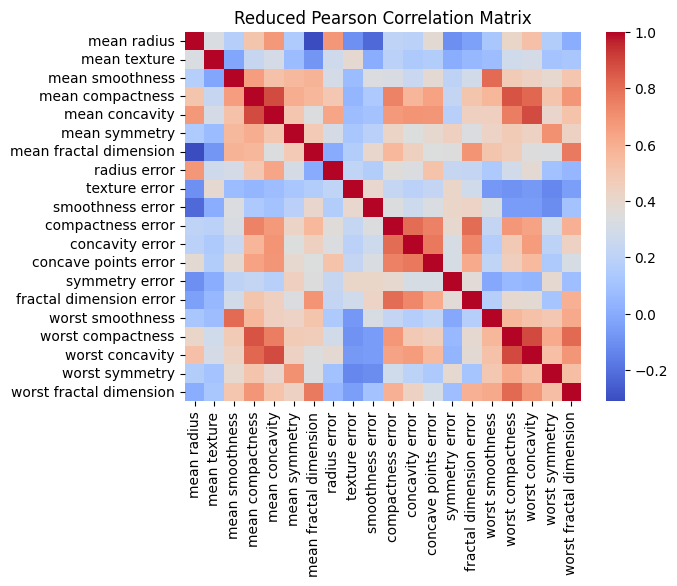

In [5]:
sns.heatmap(X_reduced.corr(method='pearson'), fmt=".2f", cmap='coolwarm')
plt.title('Reduced Pearson Correlation Matrix')

In [6]:
X_reduced.head()


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [7]:
anova_score,_ = f_classif(X_reduced , y)
anova_df = pd.DataFrame({'Feature': X_reduced.columns, 'ANOVA_Score': anova_score}).sort_values(by='ANOVA_Score', ascending=False)
anova_df


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,ANOVA_Score
0,mean radius,646.981021
4,mean concavity,533.793126
17,worst concavity,436.691939
3,mean compactness,313.233079
16,worst compactness,304.341063
7,radius error,268.840327
15,worst smoothness,122.472880
18,worst symmetry,118.860232
1,mean texture,118.096059
12,concave points error,113.262760


In [8]:
def anova_score_drop(X, y, threshold):
    anova_scores, _ = f_classif(X, y)
    selected_scores = anova_scores >= threshold
    X_anova = X.loc[:, selected_scores]
    return X_anova
X_reduced_anova = anova_score_drop(X_reduced, y, threshold=1)
X_reduced_anova.head()

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,radius error,smoothness error,compactness error,concavity error,concave points error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,1.0950,0.006399,0.04904,0.05373,0.01587,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.5435,0.005225,0.01308,0.01860,0.01340,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.7456,0.006150,0.04006,0.03832,0.02058,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.4956,0.009110,0.07458,0.05661,0.01867,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.7572,0.011490,0.02461,0.05688,0.01885,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [9]:
X_reduced_anova.head()
X_reduced_anova.shape

(569, 17)

In [12]:
X_reduced_anova['tumer_size'] = pd.cut(X_reduced_anova['mean radius'], bins=[0,12,18,np.inf], labels=['small','medium','large'])
le = LabelEncoder()
X_reduced_anova['tumer_size'] = le.fit_transform(X_reduced_anova['tumer_size'])
X_reduced_anova.head()

C:\Users\mosta\AppData\Local\Temp\ipykernel_21468\1456741612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced_anova['tumer_size'] = pd.cut(X_reduced_anova['mean radius'], bins=[0,12,18,np.inf], labels=['small','medium','large'])
C:\Users\mosta\AppData\Local\Temp\ipykernel_21468\1456741612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced_anova['tumer_size'] = le.fit_transform(X_reduced_anova['tumer_size'])


,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,radius error,smoothness error,compactness error,concavity error,concave points error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,tumer_size
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,1.0950,0.006399,0.04904,0.05373,0.01587,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.5435,0.005225,0.01308,0.01860,0.01340,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.7456,0.006150,0.04006,0.03832,0.02058,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.4956,0.009110,0.07458,0.05661,0.01867,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,2
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.7572,0.011490,0.02461,0.05688,0.01885,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0


In [15]:
chi2_score, _ = chi2(X_reduced_anova[['tumer_size']], y)
chi2_score

array([87.96575895])

In [20]:
# ANOVA between numerical features and categorical tumer_size
anova_scores, _ = f_classif(X_reduced_anova.drop(columns=['tumer_size']), X_reduced_anova['tumer_size'])
anova_df = pd.DataFrame({
    'Feature': X_reduced_anova.drop(columns=['tumer_size']).columns,
    'ANOVA_Score': anova_scores,
}).sort_values(by='ANOVA_Score', ascending=False)
anova_df

,Feature,ANOVA_Score
0,mean radius,1196.406174
6,radius error,169.604161
4,mean concavity,150.098549
14,worst concavity,76.923175
3,mean compactness,63.827368
7,smoothness error,47.508712
13,worst compactness,42.110575
10,concave points error,34.065515
1,mean texture,25.871571
9,concavity error,10.690821
